In [441]:
import pandas as pd
import numpy as num
import seaborn as sea
import matplotlib.pyplot as pl
import math
%matplotlib inline


In [442]:
diabetes=pd.read_csv('diabetic_data.csv')
ids=pd.read_csv('IDs_mapping.csv')

In [443]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Droping unneccesary identity columns

In [444]:
diabetes.drop(['encounter_id', 'patient_nbr'],axis=1,inplace=True)

In [445]:
diabetes

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [446]:
diabetes.weight.describe()

count     101766
unique        10
top            ?
freq       98569
Name: weight, dtype: object

Since only 2% of entries have information in the weight column, it would be hard to gain any relavent information from it, so we went ahead and dropped it.

In [447]:
diabetes.drop(['weight'],axis=1,inplace=True)

similarly, this column has no information provided and can also be dropped

In [448]:
diabetes.citoglipton.describe()

count     101766
unique         1
top           No
freq      101766
Name: citoglipton, dtype: object

In [449]:
diabetes.drop(['citoglipton'],axis=1,inplace=True)

At this point it is clear that each column will need to be checked for similar amounts of missing data, so a function will be used to make the process smoother

In [450]:
def describe(inputs):
    for items in inputs:
        print(diabetes[items].describe())
describe(diabetes.columns)

count        101766
unique            6
top       Caucasian
freq          76099
Name: race, dtype: object
count     101766
unique         3
top       Female
freq       54708
Name: gender, dtype: object
count      101766
unique         10
top       [70-80)
freq        26068
Name: age, dtype: object
count    101766.000000
mean          2.024006
std           1.445403
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64
count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64
count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64
count    101766.0000

Out of the columns it is clear that the following colums lack the necessary information to nake notible predictions with: 

max_glu_serum,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,tolbutamide,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,and metformin-pioglitazone

The cutoff of information used was 95% with many columns having less than 100 entries. Each of them will be dropped.

In [451]:
diabetes.drop(['diag_1','diag_2','diag_3','max_glu_serum','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','tolbutamide','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True)

In [452]:
diabetes

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,1,None,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,9,None,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,6,None,No,Steady,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,7,None,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,5,None,No,Steady,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,?,51,...,9,>8,Steady,No,No,No,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,?,33,...,9,None,No,No,No,No,Steady,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,MC,?,53,...,13,None,Steady,No,No,No,Down,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,9,None,No,Steady,No,Steady,Up,Ch,Yes,NO


In [453]:
diabetes.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
insulin                     object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

Cleaning: Takeing the upperbound of the age group

In [454]:
diabetes.age

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object

A function will be used to take the upper bound for the age column

In [455]:
def upper(entry):
    return entry[-3:-1]
diabetes['age']=list(map(lambda x:upper(x),diabetes['age']))

In [456]:
diabetes['age']=pd.to_numeric(diabetes['age'])

In [457]:
diabetes['age'].describe()

count    101766.000000
mean         68.222491
std          19.017577
min           0.000000
25%          60.000000
50%          70.000000
75%          80.000000
max          90.000000
Name: age, dtype: float64

In [458]:
admin_id=ids.iloc[0:8,:]
admin_id.index=admin_id['admission_type_id']

In [459]:
dispo_id=ids.iloc[10:40,:]
dispo_id.index=dispo_id['admission_type_id']

In [460]:
admin_source_id=ids.iloc[42:68,:]
admin_source_id.index=admin_source_id['admission_type_id']

In [461]:
diabetes

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,1,?,Pediatrics-Endocrinology,41,...,1,None,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,7,3,?,?,59,...,9,None,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,30,1,1,7,2,?,?,11,...,6,None,No,Steady,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,7,2,?,?,44,...,7,None,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,50,1,1,7,1,?,?,51,...,5,None,No,Steady,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,7,3,MC,?,51,...,9,>8,Steady,No,No,No,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,90,1,4,5,5,MC,?,33,...,9,None,No,No,No,No,Steady,No,Yes,NO
101763,Caucasian,Male,80,1,1,7,1,MC,?,53,...,13,None,Steady,No,No,No,Down,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,7,10,MC,Surgery-General,45,...,9,None,No,Steady,No,Steady,Up,Ch,Yes,NO


Admission Id:

In [462]:
def map_id(source,identify):
    return source.description[identify-1]
diabetes['admission_type_id']=list(map(lambda x:map_id(admin_id,x),diabetes['admission_type_id']))
diabetes['discharge_disposition_id']=list(map(lambda x:map_id(dispo_id,x),diabetes['discharge_disposition_id']))
diabetes['admission_source_id']=list(map(lambda x:map_id(admin_source_id,x),diabetes['admission_source_id']))

In [463]:
diabetes

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,10,NaN,Not Mapped,Physician Referral,1,?,Pediatrics-Endocrinology,41,...,1,None,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,Emergency,Discharged to home,Emergency Room,3,?,?,59,...,9,None,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,30,Emergency,Discharged to home,Emergency Room,2,?,?,11,...,6,None,No,Steady,No,No,No,No,Yes,NO
3,Caucasian,Male,40,Emergency,Discharged to home,Emergency Room,2,?,?,44,...,7,None,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,50,Emergency,Discharged to home,Emergency Room,1,?,?,51,...,5,None,No,Steady,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,Emergency,Discharged/transferred to SNF,Emergency Room,3,MC,?,51,...,9,>8,Steady,No,No,No,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,90,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,MC,?,33,...,9,None,No,No,No,No,Steady,No,Yes,NO
101763,Caucasian,Male,80,Emergency,Discharged to home,Emergency Room,1,MC,?,53,...,13,None,Steady,No,No,No,Down,Ch,Yes,NO
101764,Caucasian,Female,90,Urgent,Discharged/transferred to SNF,Emergency Room,10,MC,Surgery-General,45,...,9,None,No,Steady,No,Steady,Up,Ch,Yes,NO


visualization

Heatmap of correlation

In [464]:
diabetes.corr()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
age,1.000000,0.072724,0.005676,0.031407,0.074169,0.030757,-0.062809,-0.027124,0.168859
time_in_hospital,0.072724,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.005676,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.031407,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.074169,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.030757,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.062809,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,-0.027124,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.168859,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


<AxesSubplot:>

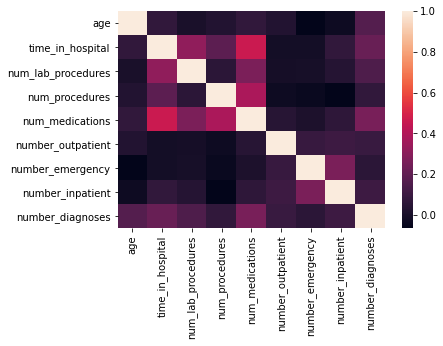

In [465]:
sea.heatmap(diabetes.corr())

distribution of age

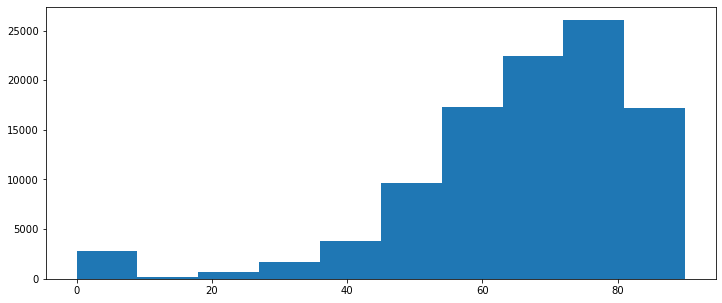

In [466]:
figure,axis=pl.subplots(figsize=(12,5))
age_hisogram=axis.hist(diabetes['age'],10)

distribution of time in hospital

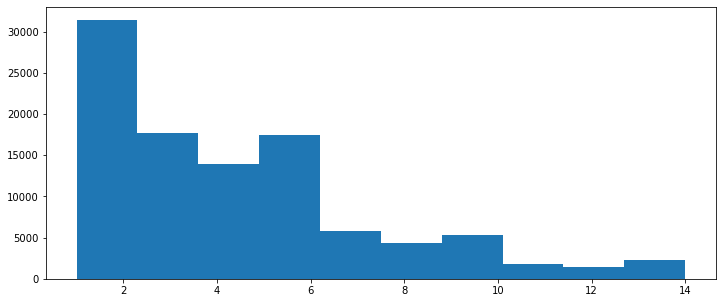

In [467]:
figure,axis=pl.subplots(figsize=(12,5))
time_hisogram=axis.hist(diabetes['time_in_hospital'],10)

Lab Procedures

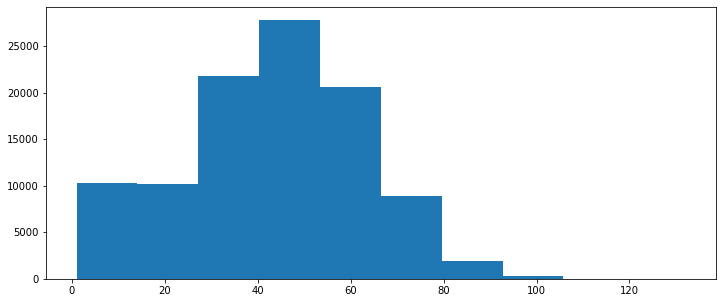

In [468]:
figure,axis=pl.subplots(figsize=(12,5))
lab_hisogram=axis.hist(diabetes['num_lab_procedures'],10)

Number of Procedures

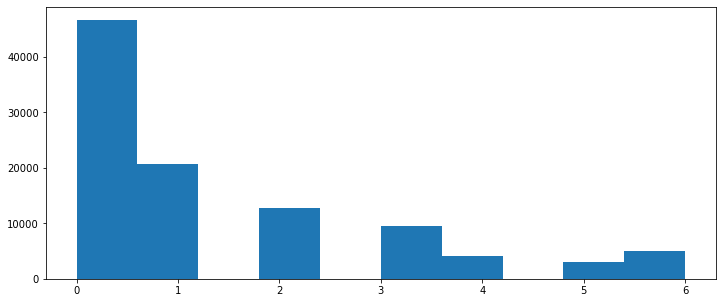

In [469]:
figure,axis=pl.subplots(figsize=(12,5))
lab_hisogram=axis.hist(diabetes['num_procedures'],10)

Number of Medications

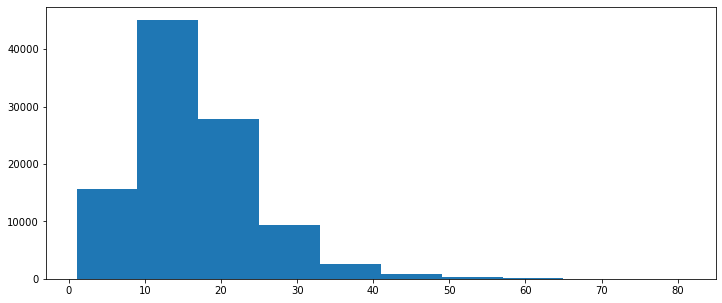

In [470]:
figure,axis=pl.subplots(figsize=(12,5))
lab_hisogram=axis.hist(diabetes['num_medications'],10)

Descision tree testing: Insulin levels

In [477]:
tree_data=diabetes.query('insulin!="No"')

1-hot-encoding for variables:

changes,diabetes med, readmission

In [478]:
def race_hot_encode(entry):
    if entry=='Caucasian':
        return 'Caucasian'
    else:
        return 'Non-Caicasian'
tree_data['race']=list(map(lambda x:race_hot_encode(x),tree_data['race']))

<ipython-input-478-af6c157479fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['race']=list(map(lambda x:race_hot_encode(x),tree_data['race']))


In [ ]:
def gender_hot_encode(entry):
    

In [479]:
def median_hot_encode(source,entry):
    if entry>source.median():
        return 1
    else:
        return 0
tree_data['age']=list(map(lambda x:median_hot_encode(tree_data['age'],x),tree_data['age']))
tree_data['time_in_hospital']=list(map(lambda x:median_hot_encode(tree_data['time_in_hospital'],x),tree_data['time_in_hospital']))
tree_data['num_procedures']=list(map(lambda x:median_hot_encode(tree_data['num_procedures'],x),tree_data['num_procedures']))
tree_data['num_lab_procedures']=list(map(lambda x:median_hot_encode(tree_data['num_lab_procedures'],x),tree_data['num_lab_procedures']))
tree_data['num_medications']=list(map(lambda x:median_hot_encode(tree_data['num_medications'],x),tree_data['num_medications']))
tree_data['number_outpatient']=list(map(lambda x:median_hot_encode(tree_data['number_outpatient'],x),tree_data['number_outpatient']))
tree_data['number_inpatient']=list(map(lambda x:median_hot_encode(tree_data['number_inpatient'],x),tree_data['number_inpatient']))
tree_data['number_emergency']=list(map(lambda x:median_hot_encode(tree_data['number_emergency'],x),tree_data['number_emergency']))
tree_data['number_diagnoses']=list(map(lambda x:median_hot_encode(tree_data['number_diagnoses'],x),tree_data['number_diagnoses']))

<ipython-input-479-4f8af75a83ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['age']=list(map(lambda x:median_hot_encode(tree_data['age'],x),tree_data['age']))
<ipython-input-479-4f8af75a83ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['time_in_hospital']=list(map(lambda x:median_hot_encode(tree_data['time_in_hospital'],x),tree_data['time_in_hospital']))
<ipython-input-479-4f8af75a83ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [480]:
def level_hot_encode(entry):
    if entry=='Steady':
        return 'Steady'
    else:
        return 'Unsteady'
tree_data['glipizide']=list(map(lambda x:level_hot_encode(x),tree_data['glipizide']))
tree_data['insulin']=list(map(lambda x:level_hot_encode(x),tree_data['insulin']))
tree_data['metformin']=list(map(lambda x:level_hot_encode(x),tree_data['metformin']))
tree_data['glyburide']=list(map(lambda x:level_hot_encode(x),tree_data['glyburide']))
tree_data['pioglitazone']=list(map(lambda x:level_hot_encode(x),tree_data['pioglitazone']))

<ipython-input-480-e83a3bf61459>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['glipizide']=list(map(lambda x:level_hot_encode(x),tree_data['glipizide']))
<ipython-input-480-e83a3bf61459>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['insulin']=list(map(lambda x:level_hot_encode(x),tree_data['insulin']))
<ipython-input-480-e83a3bf61459>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [481]:
def change_hot_encode(entry):
    if entry=='Ch':
        return 1
    else:
        return 0
tree_data['change']=list(map(lambda x:change_hot_encode(x),tree_data['change']))

<ipython-input-481-dd3616b28ad8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['change']=list(map(lambda x:change_hot_encode(x),tree_data['change']))


In [482]:
def binary_hot_encode(wanted,entry):
    if entry==wanted:
        return 1
    else:
        return 0
tree_data['readmitted']=list(map(lambda x:binary_hot_encode('NO',x),tree_data['readmitted']))
tree_data['diabetesMed']=list(map(lambda x:binary_hot_encode('yes',x),tree_data['diabetesMed']))

<ipython-input-482-ecb020056daa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['readmitted']=list(map(lambda x:binary_hot_encode('NO',x),tree_data['readmitted']))
<ipython-input-482-ecb020056daa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data['diabetesMed']=list(map(lambda x:binary_hot_encode('yes',x),tree_data['diabetesMed']))


In [483]:
tree_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,0,Emergency,Discharged to home,Emergency Room,0,?,?,1,...,0,None,Unsteady,Unsteady,Unsteady,Unsteady,Unsteady,1,0,0
3,Caucasian,Male,0,Emergency,Discharged to home,Emergency Room,0,?,?,0,...,0,None,Unsteady,Unsteady,Unsteady,Unsteady,Unsteady,1,0,1
4,Caucasian,Male,0,Emergency,Discharged to home,Emergency Room,0,?,?,1,...,0,None,Unsteady,Steady,Unsteady,Unsteady,Steady,1,0,1
5,Caucasian,Male,0,Urgent,Discharged to home,Clinic Referral,0,?,?,0,...,0,None,Unsteady,Unsteady,Unsteady,Unsteady,Steady,0,0,0
6,Caucasian,Male,0,Elective,Discharged to home,Clinic Referral,0,?,?,1,...,0,None,Steady,Unsteady,Unsteady,Unsteady,Steady,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,Non-Caicasian,Female,0,Emergency,Discharged to home,Emergency Room,1,DM,?,0,...,0,None,Unsteady,Unsteady,Unsteady,Unsteady,Unsteady,1,0,0
101761,Non-Caicasian,Male,1,Emergency,Discharged/transferred to SNF,Emergency Room,0,MC,?,1,...,0,>8,Steady,Unsteady,Unsteady,Unsteady,Unsteady,1,0,0
101762,Non-Caicasian,Female,1,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),1,MC,?,0,...,0,None,Unsteady,Unsteady,Unsteady,Unsteady,Steady,0,0,1
101763,Caucasian,Male,1,Emergency,Discharged to home,Emergency Room,0,MC,?,1,...,1,None,Steady,Unsteady,Unsteady,Unsteady,Unsteady,1,0,1


Linear Regression Testing: Age and Hospital stay

In [393]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

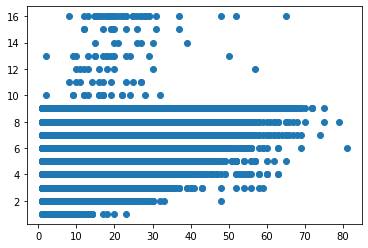

In [403]:

pl.scatter(diabetes['num_medications'],diabetes['number_diagnoses'])